# Sentiment Analysis
Building a series of RNN models for sentiment analysis with IMDB reviews

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import random
import numpy as np
import tensorflow as tf

random.seed(1693)
np.random.seed(1693)
tf.random.set_seed(1693)

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.layers import LSTM
#from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import datetime as dt

# Step 1: Load & Prep Dataframes

Read the IMDB data directly from Keras's datasets module

Officiall documentation here: https://keras.io/api/datasets/imdb/

In [ ]:
# [Hyperparameter Tuning Zone]
max_features = 10000 # Limit dictionary size to 10000 most frequently used words and tokens
maxlen = 80 # Set sequence length to 80
batch_size = 128
num_epochs = 10

In [ ]:
# This module allows you to split data automatically while reading in the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # specify the size of dictionary
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[0][:12]) # Inspect the first 12 words in the first document. It's a vector of numbers between 0-9999, referring to words in the dictionary

17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468]


In [ ]:
# Taking a look at a record
print(x_train[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


# Step 2: Prep train vs. test sets

In [ ]:
# Pad the sequences so they are of the same lengths
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding='pre') # pre = pad before sentence; post = pad after sentence
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, padding='pre')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train.shape

x_train shape: (25000, 80)
x_test shape: (25000, 80)


(25000,)

In [ ]:
print(x_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1  778  128   74   12
  630  163   15    4 1766 7982 1051    2   32   85  156   45   40  148
  139  121  664  665   10   10 1361  173    4  749    2   16 3804    8
    4  226   65   12   43  127   24    2   10   10]


# Step 3: Train model

## Model 1 = fully-connected dense NN without embedding

In [ ]:
model1 = Sequential()
model1.add(Dense(16, activation ="relu", input_dim = maxlen))
model1.add(Dense(16, activation ="relu"))
model1.add(Dense(1, activation ="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1296      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1585 (6.19 KB)
Trainable params: 1585 (6.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
np.random.seed(1693) # Go Tribe!
start_time = dt.datetime.now() # Measuring run time using datetime library

# Saving model.fit result as the object estimate
estimate = model1.fit(x_train,
                     y_train,
                     epochs=num_epochs, # more epochs will take longer to run
                     verbose=2, # change to 1 or 2 to see more details
                     batch_size=batch_size,
                     #validation_data=(x_test,y_test)
                     )
# print(estimate.history)
stop_time=dt.datetime.now()
print("datetime thinks the program ran for " + str(stop_time - start_time))

Epoch 1/10
196/196 - 1s - loss: 100.8426 - accuracy: 0.4994 - 1s/epoch - 7ms/step
Epoch 2/10
196/196 - 0s - loss: 5.3059 - accuracy: 0.5012 - 432ms/epoch - 2ms/step
Epoch 3/10
196/196 - 0s - loss: 1.3890 - accuracy: 0.5038 - 452ms/epoch - 2ms/step
Epoch 4/10
196/196 - 0s - loss: 0.8304 - accuracy: 0.4986 - 345ms/epoch - 2ms/step
Epoch 5/10
196/196 - 0s - loss: 0.7214 - accuracy: 0.5006 - 392ms/epoch - 2ms/step
Epoch 6/10
196/196 - 0s - loss: 0.7037 - accuracy: 0.4996 - 401ms/epoch - 2ms/step
Epoch 7/10
196/196 - 0s - loss: 0.6989 - accuracy: 0.4962 - 356ms/epoch - 2ms/step
Epoch 8/10
196/196 - 0s - loss: 0.6976 - accuracy: 0.4978 - 346ms/epoch - 2ms/step
Epoch 9/10
196/196 - 0s - loss: 0.6967 - accuracy: 0.4978 - 369ms/epoch - 2ms/step
Epoch 10/10
196/196 - 0s - loss: 0.6949 - accuracy: 0.5016 - 368ms/epoch - 2ms/step
datetime thinks the program ran for 0:00:06.159238


## Model 2 = RNN with embedding

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=10000, # 10000 one-hot coded X features
                    output_dim=3)) # output is 3-D embedding values
model2.add(SimpleRNN(3, activation='relu'))
model2.add(Dense(1, activation ="sigmoid"))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 3)           30000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 30025 (117.29 KB)
Trainable params: 30025 (117.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start_time = dt.datetime.now()
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

estimate = model2.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(x_test, y_test),
                    verbose = 2)
# Model takes a while to compile on my computer, may take lesser on HPC environment.
stop_time = dt.datetime.now()
print ("Time required for training:",stop_time - start_time)


Epoch 1/10
196/196 - 8s - loss: 0.6902 - accuracy: 0.5424 - val_loss: 0.6870 - val_accuracy: 0.5549 - 8s/epoch - 40ms/step
Epoch 2/10
196/196 - 5s - loss: 0.6788 - accuracy: 0.5912 - val_loss: 0.6772 - val_accuracy: 0.5800 - 5s/epoch - 25ms/step
Epoch 3/10
196/196 - 6s - loss: 0.6608 - accuracy: 0.6290 - val_loss: 0.6666 - val_accuracy: 0.5885 - 6s/epoch - 31ms/step
Epoch 4/10
196/196 - 5s - loss: 0.6406 - accuracy: 0.6546 - val_loss: 0.6595 - val_accuracy: 0.5933 - 5s/epoch - 24ms/step
Epoch 5/10
196/196 - 5s - loss: 0.6218 - accuracy: 0.6710 - val_loss: 0.6561 - val_accuracy: 0.5947 - 5s/epoch - 25ms/step
Epoch 6/10
196/196 - 7s - loss: 0.6053 - accuracy: 0.6828 - val_loss: 0.6562 - val_accuracy: 0.5959 - 7s/epoch - 35ms/step
Epoch 7/10
196/196 - 5s - loss: 0.5908 - accuracy: 0.6931 - val_loss: 0.6598 - val_accuracy: 0.5950 - 5s/epoch - 24ms/step
Epoch 8/10
196/196 - 6s - loss: 0.5783 - accuracy: 0.7030 - val_loss: 0.6632 - val_accuracy: 0.5967 - 6s/epoch - 30ms/step
Epoch 9/10
196/1

## Model 3 = LSTM

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=max_features,
                    output_dim=128))
model3.add(LSTM(128,
               dropout=0.2,
               recurrent_dropout=0.0,
               recurrent_activation="sigmoid",
               activation="tanh",
               use_bias=True,
               unroll=False))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start_time = dt.datetime.now()
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

estimate = model3.fit(x_train,
                     y_train,
                     batch_size=batch_size,
                     epochs=num_epochs,
                     validation_data=(x_test, y_test))

# Takes long to run.
stop_time = dt.datetime.now()
print ("Time required for training:",stop_time - start_time)

Epoch 1/10
196/196 [==============================] - 102s 504ms/step - loss: 0.4493 - accuracy: 0.7796 - val_loss: 0.4003 - val_accuracy: 0.8160
Epoch 2/10
196/196 [==============================] - 114s 584ms/step - loss: 0.2882 - accuracy: 0.8834 - val_loss: 0.3899 - val_accuracy: 0.8356
Epoch 3/10
196/196 [==============================] - 113s 576ms/step - loss: 0.2222 - accuracy: 0.9135 - val_loss: 0.3839 - val_accuracy: 0.8367
Epoch 4/10
196/196 [==============================] - 115s 587ms/step - loss: 0.1681 - accuracy: 0.9385 - val_loss: 0.5229 - val_accuracy: 0.8224
Epoch 5/10
196/196 [==============================] - 115s 586ms/step - loss: 0.1296 - accuracy: 0.9532 - val_loss: 0.5219 - val_accuracy: 0.8229
Epoch 6/10
196/196 [==============================] - 114s 583ms/step - loss: 0.1003 - accuracy: 0.9646 - val_loss: 0.6215 - val_accuracy: 0.8180
Epoch 7/10
196/196 [==============================] - 93s 475ms/step - loss: 0.0773 - accuracy: 0.9730 - val_loss: 0.7645 - 

# Step 4: Evaluate Model Performance

196/196 [==============================] - 25s 127ms/step - loss: 0.9186 - accuracy: 0.7989
Test score: 0.9186033606529236
Test accuracy: 0.7989199757575989


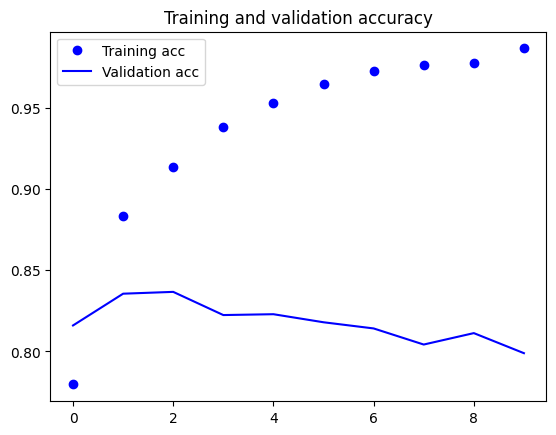

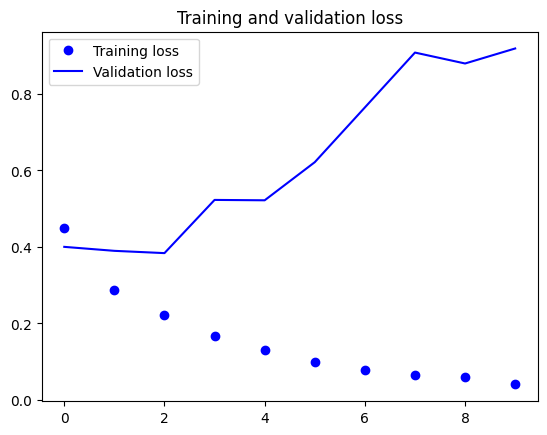

In [ ]:
score, accuracy = model3.evaluate(x_test,
                                 y_test,
                                 batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accuracy)

acc = estimate.history['accuracy']
val_acc = estimate.history['val_accuracy']
loss = estimate.history['loss']
val_loss = estimate.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()